In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_tms.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [58]:
df = df.dropna(subset=['Embarked'])

In [59]:
def get_title(name):
    if pd.isna(name):
        return None
    if "Mr." in name:
        return "Mr"
    elif "Mrs." in name:
        return "Mrs"
    elif "Miss." in name or "Ms." in name:
        return "Miss"
    elif "Master." in name:
        return "Master"
    else:
        return "Other"

df['Title'] = df['Name'].apply(get_title)
title_age_median = df.groupby('Title')['Age'].median()

df['Age'] = df.apply(lambda row: title_age_median[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1)

In [60]:
df['FamilySize'] = 1 + df['SibSp'] + df['Parch']
df['HasFamily'] = (df['FamilySize'] > 1).astype(int)

In [61]:
from sklearn.preprocessing import LabelEncoder

new_df = df[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']].copy()
le = LabelEncoder()
new_df['Sex'] = le.fit_transform(new_df['Sex'])

new_df = pd.get_dummies(new_df, columns=['Embarked'], prefix='Embarked')
new_df.head(10)

,Pclass,Sex,Age,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,2,False,False,True
1,1,0,38.0,2,True,False,False
2,3,0,26.0,1,False,False,True
3,1,0,35.0,2,False,False,True
4,3,1,35.0,1,False,False,True
5,3,1,30.0,1,False,True,False
6,1,1,54.0,1,False,False,True
7,3,1,2.0,5,False,False,True
8,3,0,27.0,3,False,False,True
9,2,0,14.0,2,True,False,False


In [62]:
X = new_df

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

sil_kmeans = silhouette_score(X, labels_kmeans)
print("Silhouette KMeans:", sil_kmeans)


Silhouette KMeans: 0.5474859484642526


In [64]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X)

sil_agg = silhouette_score(X, labels_agg)
print("Silhouette Agglomerative:", sil_agg)

Silhouette Agglomerative: 0.5753919478469643


In [65]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

if len(set(labels_dbscan)) > 1:
    sil_dbscan = silhouette_score(X, labels_dbscan)
    print("Silhouette DBSCAN:", sil_dbscan)
else:
    print("DBSCAN не смог выделить кластеры")


Silhouette DBSCAN: -0.40712972424987953


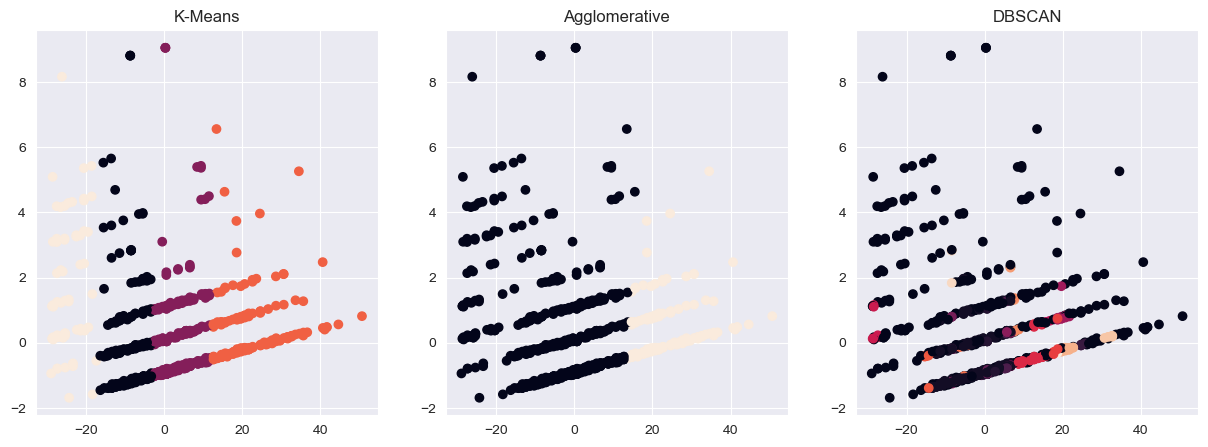

In [66]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans)
plt.title('K-Means')

plt.subplot(1,3,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_agg)
plt.title('Agglomerative')

plt.subplot(1,3,3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan)
plt.title('DBSCAN')

plt.show()


In [67]:
df['KMeans_Cluster'] = labels_kmeans
df['Agglomerative_Cluster'] = labels_agg
df['DBSCAN_Cluster'] = labels_dbscan

df[['Pclass', 'Sex', 'Age', 'FamilySize', 'Embarked', 'Survived', 'KMeans_Cluster', 'Agglomerative_Cluster', 'DBSCAN_Cluster']]

,Pclass,Sex,Age,FamilySize,Embarked,Survived,KMeans_Cluster,Agglomerative_Cluster,DBSCAN_Cluster
0,3,male,22.0,2,S,0,0,0,0
1,1,female,38.0,2,C,1,1,0,-1
2,3,female,26.0,1,S,1,0,0,0
3,1,female,35.0,2,S,1,1,0,0
4,3,male,35.0,1,S,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,1,S,0,1,0,0
887,1,female,19.0,1,S,1,0,0,0
888,3,female,21.0,4,S,0,0,0,18
889,1,male,26.0,1,C,1,0,0,-1


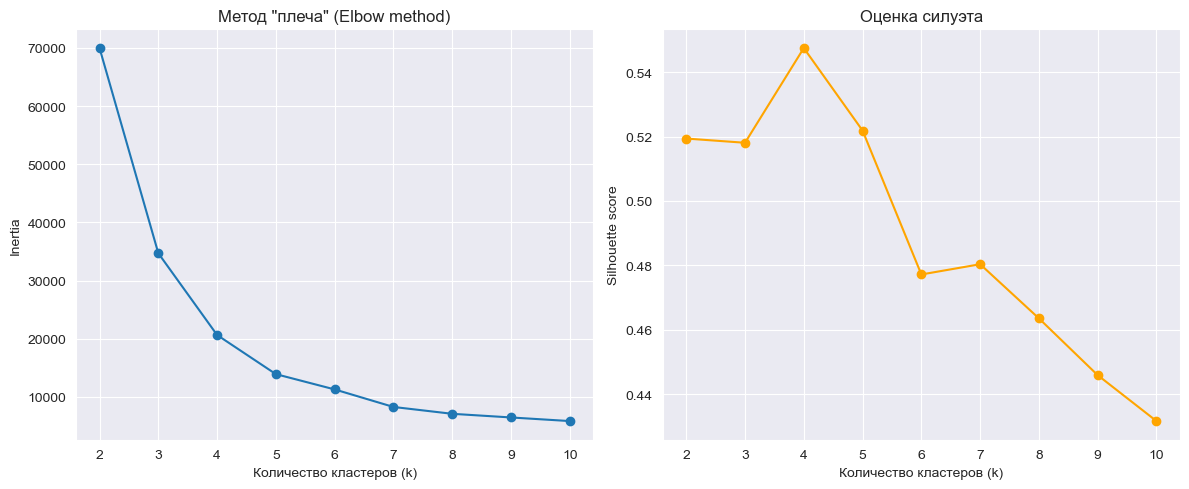

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(K_range, inertias, marker='o')
ax[0].set_title('Метод "плеча" (Elbow method)')
ax[0].set_xlabel('Количество кластеров (k)')
ax[0].set_ylabel('Inertia')
ax[0].grid(True)

ax[1].plot(K_range, silhouette_scores, marker='o', color='orange')
ax[1].set_title('Оценка силуэта')
ax[1].set_xlabel('Количество кластеров (k)')
ax[1].set_ylabel('Silhouette score')
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [69]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)

clustered_df = new_df.copy()
clustered_df['Cluster'] = labels

cluster_summary = clustered_df.groupby('Cluster').mean(numeric_only=True)

print("Средние значения признаков по кластерам:")
print(cluster_summary)

print("\nРазмеры кластеров:")
print(clustered_df['Cluster'].value_counts())


Средние значения признаков по кластерам:
           Pclass       Sex        Age  FamilySize  Embarked_C  Embarked_Q  \
Cluster                                                                      
0        2.531469  0.541958  20.860140    1.842657    0.171329    0.115385   
1        2.304124  0.726804  32.113402    1.590206    0.193299    0.092784   
2        1.711268  0.697183  51.521127    1.647887    0.218310    0.028169   
3        2.657534  0.561644   4.700959    4.342466    0.178082    0.054795   

         Embarked_S  
Cluster              
0          0.713287  
1          0.713918  
2          0.753521  
3          0.767123  

Размеры кластеров:
Cluster
1    388
0    286
2    142
3     73
Name: count, dtype: int64


🟢 Кластер 0 — Молодые пассажиры (возможно студенты, молодые пары)
Средний возраст ≈ 21 год.
Пол сбалансирован (чуть больше мужчин).
FamilySize ≈ 2 — часто едут вдвоём (пара, брат/сестра).
Pclass ≈ 2.5 — в основном 2–3 класс.
По портам посадки распределены равномерно.
📌 Вероятно: молодые люди из среднего и низшего класса, не одиночки.

🔵 Кластер 1 — Мужчины среднего возраста, одиночки
Возраст ≈ 32 года.
Мужчины преобладают (0.73).
Небольшой FamilySize — часто едут одни.
Класс 2–3, порты — типичные (в основном S).
📌 Вероятно: работающие мужчины, мигранты или пассажиры, едущие по делам.

🟠 Кластер 2 — Пожилые, состоятельные пассажиры
Возраст ≈ 51 год.
Большинство — мужчины.
Pclass ≈ 1.7 — в основном 1-й класс.
Мало сопровождающих.
📌 Вероятно: обеспеченные мужчины, путешествующие без семьи (возможно, бизнесмены или пожилые джентльмены).

🟣 Кластер 3 — Дети из больших семей
Возраст ≈ 4.7 лет (!).
FamilySize ≈ 4.3 — большие семьи.
Pclass ≈ 2.7 — в основном 3-й класс.
📌 Очевидно: дети с родителями, вероятно эмигрантские семьи из низшего класса.



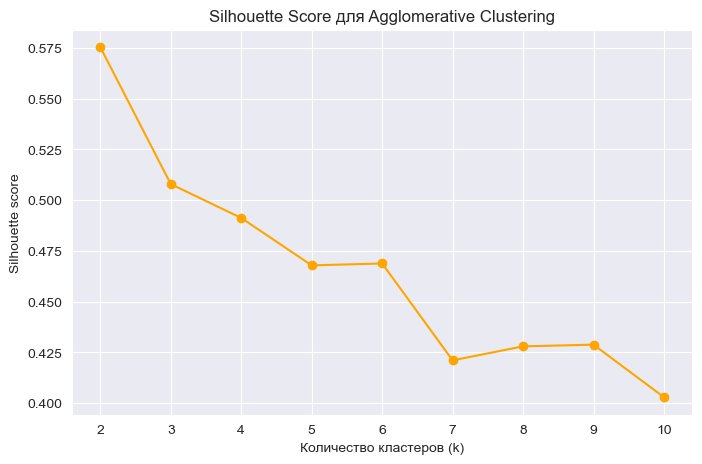

Оптимальное число кластеров: 2, silhouette = 0.575


In [70]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score для Agglomerative Clustering')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Оптимальное число кластеров: {best_k}, silhouette = {max(silhouette_scores):.3f}")


In [71]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(X)

sil_agg = silhouette_score(X, labels_agg)
print("Silhouette Agglomerative:", sil_agg)

Silhouette Agglomerative: 0.5753919478469643


In [72]:
clustered_df = new_df.copy()
clustered_df['Cluster'] = labels_agg

cluster_summary = clustered_df.groupby('Cluster').mean(numeric_only=True)

print("Средние значения признаков по кластерам:")
print(cluster_summary)

print("\nРазмеры кластеров:")
print(clustered_df['Cluster'].value_counts())


Средние значения признаков по кластерам:
           Pclass       Sex        Age  FamilySize  Embarked_C  Embarked_Q  \
Cluster                                                                      
0        2.417539  0.640052  25.509385    1.960733    0.180628     0.09555   
1        1.664000  0.704000  52.768000    1.576000    0.240000     0.03200   

         Embarked_S  
Cluster              
0          0.723822  
1          0.728000  

Размеры кластеров:
Cluster
0    764
1    125
Name: count, dtype: int64


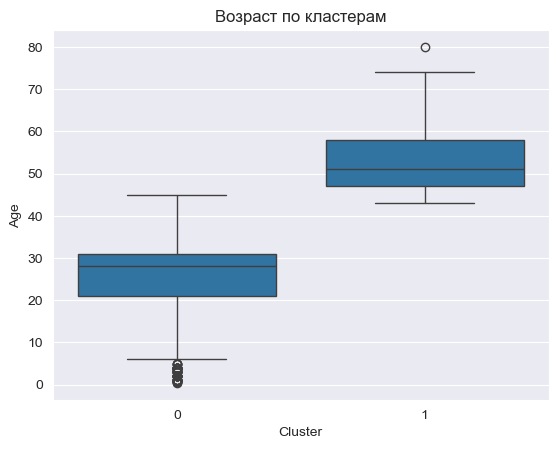

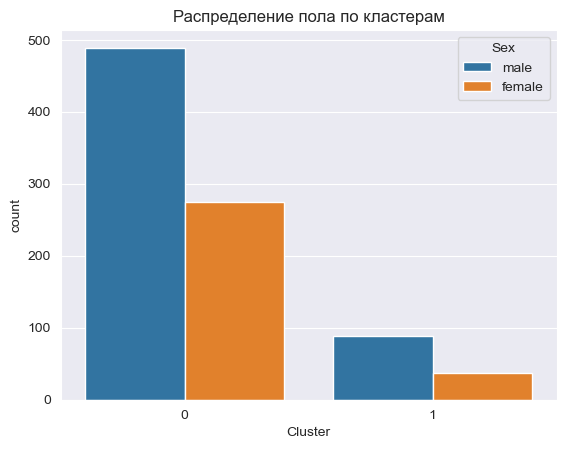

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Age', data=clustered_df)
plt.title('Возраст по кластерам')
plt.show()

sns.countplot(x='Cluster', hue='Sex', data=clustered_df.replace({'Sex': {0: 'female', 1: 'male'}}))
plt.title('Распределение пола по кластерам')
plt.show()


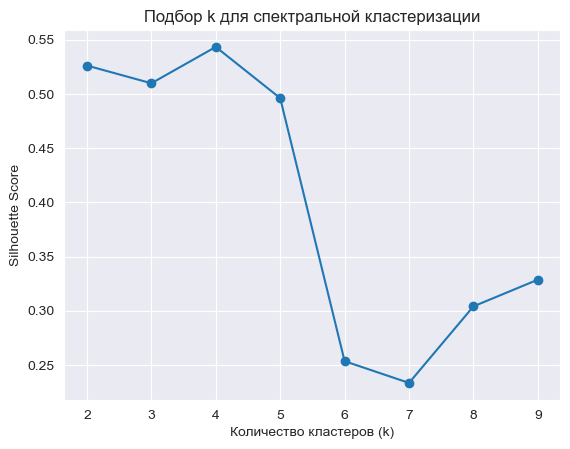

Оптимальное k по силуэту: 4


In [74]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import numpy as np

sil_scores = []
k_values = range(2, 10)

for k in k_values:
    spectral = SpectralClustering(
        n_clusters=k,
        affinity='nearest_neighbors',
        assign_labels='kmeans',
        random_state=42
    )
    labels = spectral.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

import matplotlib.pyplot as plt

plt.plot(k_values, sil_scores, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Silhouette Score')
plt.title('Подбор k для спектральной кластеризации')
plt.show()

optimal_k = k_values[np.argmax(sil_scores)]
print(f"Оптимальное k по силуэту: {optimal_k}")


In [75]:
from sklearn.cluster import SpectralClustering
import pandas as pd

optimal_k = 4  # число кластеров

# создаём и обучаем спектральную модель
spectral = SpectralClustering(
    n_clusters=optimal_k,
    affinity='nearest_neighbors',  # можно 'rbf' или 'nearest_neighbors'
    assign_labels='kmeans',        # алгоритм назначения меток
    random_state=42
)
labels = spectral.fit_predict(X)

# добавляем метки в DataFrame
clustered_df = new_df.copy()
clustered_df['Cluster'] = labels

# вычисляем средние значения признаков по каждому кластеру
cluster_summary = clustered_df.groupby('Cluster').mean(numeric_only=True)

print("Средние значения признаков по кластерам:")
print(cluster_summary)

print("\nРазмеры кластеров:")
print(clustered_df['Cluster'].value_counts())

Средние значения признаков по кластерам:
           Pclass       Sex        Age  FamilySize  Embarked_C  Embarked_Q  \
Cluster                                                                      
0        1.671875  0.695312  52.554688    1.625000    0.234375    0.031250   
1        2.527778  0.545139  20.902778    1.847222    0.177083    0.114583   
2        2.657534  0.561644   4.700959    4.342466    0.178082    0.054795   
3        2.297500  0.725000  32.487500    1.595000    0.185000    0.090000   

         Embarked_S  
Cluster              
0          0.734375  
1          0.708333  
2          0.767123  
3          0.725000  

Размеры кластеров:
Cluster
3    400
1    288
0    128
2     73
Name: count, dtype: int64


Кластер	Pclass	Sex	Age	FamilySize	Описание

0	1.67	0.70	52.6	1.63	Пожилые мужчины из 1–2 класса, небольшие семьи. Богатые, но возрастные пассажиры.

1	2.53	0.55	20.9	1.85	Молодые пассажиры 2–3 класса, примерно поровну мужчин и женщин.

2	2.66	0.56	4.7	    4.34	Дети из больших семей 3 класса, “семейный кластер”.

3	2.30	0.73	32.5	1.6	    Взрослые мужчины среднего возраста 2–3 класса, путешествуют почти одни.

In [80]:
import networkx as nx
from sklearn.neighbors import kneighbors_graph
from community import community_louvain  # пакет python-louvain
import pandas as pd

knn_graph = kneighbors_graph(X, n_neighbors=10, include_self=False)
G = nx.from_scipy_sparse_array(knn_graph)

partition = community_louvain.best_partition(G, random_state=42)

clustered_df = new_df.copy()
clustered_df['Community'] = pd.Series(partition)

community_summary = clustered_df.groupby('Community').mean(numeric_only=True)

print("Средние значения признаков по сообществам:")
print(community_summary)

print("\nРазмеры сообществ:")
print(clustered_df['Community'].value_counts())


Средние значения признаков по сообществам:
             Pclass       Sex        Age  FamilySize  Embarked_C  Embarked_Q  \
Community                                                                      
0.0        2.285714  0.607143  30.011786    1.642857    0.285714    0.071429   
1.0        2.338462  0.646154  30.846154    1.923077    0.153846    0.076923   
2.0        2.294872  0.589744  28.685897    1.974359    0.192308    0.089744   
3.0        2.458333  0.583333  30.833333    1.333333    0.250000    0.208333   
4.0        2.166667  0.444444  28.805556    1.666667    0.166667    0.000000   
5.0        2.321429  0.607143  29.517857    1.464286    0.178571    0.142857   
6.0        2.200000  0.658824  31.050000    1.858824    0.211765    0.070588   
7.0        2.357143  0.728571  24.564286    2.400000    0.114286    0.100000   
8.0        2.328125  0.656250  28.431094    1.906250    0.125000    0.109375   
9.0        2.240000  0.640000  28.745000    1.670000    0.200000    0.100000 

In [81]:
import networkx as nx
from sklearn.neighbors import kneighbors_graph
import pandas as pd

knn_graph = kneighbors_graph(X, n_neighbors=10, include_self=False)
G = nx.from_scipy_sparse_array(knn_graph)

communities = nx.algorithms.community.label_propagation_communities(G)

labels = {}
for i, community in enumerate(communities):
    for node in community:
        labels[node] = i

clustered_df = new_df.copy()
clustered_df['LP_Community'] = pd.Series(labels)

lp_summary = clustered_df.groupby('LP_Community').mean(numeric_only=True)
print("Средние признаки по сообществам Label Propagation:")
print(lp_summary)

print("\nРазмеры сообществ:")
print(clustered_df['LP_Community'].value_counts())

Средние признаки по сообществам Label Propagation:
                Pclass       Sex        Age  FamilySize  Embarked_C  \
LP_Community                                                          
0.0           2.285714  0.607143  30.011786    1.642857    0.285714   
1.0           1.900000  0.500000  31.650000    1.600000    0.200000   
2.0           2.181818  0.575758  27.073333    1.666667    0.151515   
3.0           2.421053  0.473684  34.263158    3.210526    0.157895   
4.0           2.218750  0.687500  32.562500    1.750000    0.218750   
5.0           2.321429  0.607143  29.517857    1.464286    0.178571   
6.0           1.833333  0.583333  36.875000    1.500000    0.250000   
7.0           2.125000  0.875000  27.625000    1.937500    0.187500   
8.0           2.422222  0.688889  29.337111    2.088889    0.088889   
9.0           2.000000  0.588235  29.705882    1.764706    0.176471   
10.0          2.222222  0.555556  23.333333    1.944444    0.111111   
11.0          2.266667  0.

In [83]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from scipy.linalg import eigh

X = (X - X.mean(axis=0)) / X.std(axis=0)

n_samples = X.shape[0]
k_clusters = 4
sigma = 1.0

distances = cdist(X, X, 'sqeuclidean')
W = np.exp(-distances / (2 * sigma**2))

D = np.diag(W.sum(axis=1))

D_inv_sqrt = np.diag(1.0 / np.sqrt(W.sum(axis=1)))
L_sym = np.eye(n_samples) - D_inv_sqrt @ W @ D_inv_sqrt

eigvals, eigvecs = eigh(L_sym)
X_spec = eigvecs[:, :k_clusters]

def kmeans(X, k, n_iters=100):
    n_samples, n_features = X.shape
    rng = np.random.default_rng(42)
    centroids = X[rng.choice(n_samples, k, replace=False)]

    for _ in range(n_iters):
        # Расстояния до центроидов
        dists = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
        labels = np.argmin(dists, axis=1)
        # Обновление центроидов
        for i in range(k):
            if np.any(labels == i):
                centroids[i] = X[labels == i].mean(axis=0)
    return labels

labels = kmeans(X_spec, k_clusters)

clustered_df = new_df.copy()
clustered_df['Cluster'] = labels

print("Средние значения признаков по кластерам:")
print(clustered_df.groupby('Cluster').mean(numeric_only=True))
print("\nРазмеры кластеров:")
print(clustered_df['Cluster'].value_counts())


Средние значения признаков по кластерам:
           Pclass       Sex        Age  FamilySize  Embarked_C  Embarked_Q  \
Cluster                                                                      
0        1.975806  0.463710  32.610887    1.737903    0.000000    0.000000   
1        2.775735  1.000000  27.797794    1.121324    0.000000    0.000000   
2        2.209205  0.552301  28.752803    1.686192    0.702929    0.297071   
3        2.169231  0.446154  27.421154    4.276923    0.000000    0.046154   

         Embarked_S  
Cluster              
0          1.000000  
1          1.000000  
2          0.000000  
3          0.953846  

Размеры кластеров:
Cluster
1    272
0    248
2    239
3    130
Name: count, dtype: int64
